In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import IPython
import numpy as np
import wave
import warnings
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import sys
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier as DTC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.decomposition import FastICA
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
sys.modules['sklearn.externals.joblib'] = joblib

In [5]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Q1

# Part 1)

In [6]:
PATH=""
wave_mix_1 = wave.open(PATH+'/content/drive/MyDrive/signal_1.wav','r')
wave_mix_2 = wave.open(PATH+'/content/drive/MyDrive/signal_2.wav','r')
wave_mix_3 = wave.open(PATH+'/content/drive/MyDrive/signal_3.wav','r')

In [7]:
signal_1_raw = wave_mix_1.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')

signal_2_raw = wave_mix_2.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'int16')

signal_3_raw = wave_mix_3.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'int16')

In [8]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/signal_1.wav')

In [9]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/signal_2.wav')

In [10]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/signal_3.wav')

# Part 2)

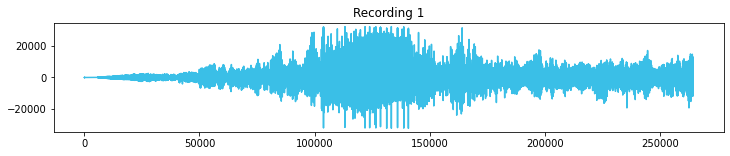

In [11]:
fs = wave_mix_1.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

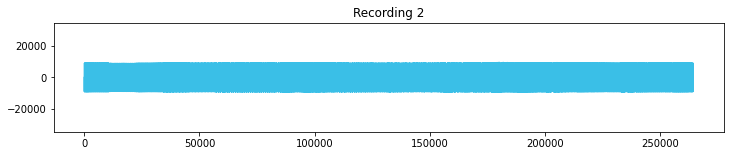

In [12]:
fs = wave_mix_2.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

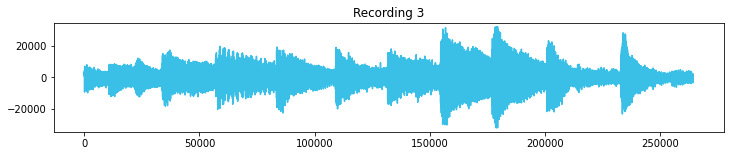

In [13]:
fs = wave_mix_3.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

In [14]:
mix_signal=list(zip(signal_1,signal_2,signal_3))

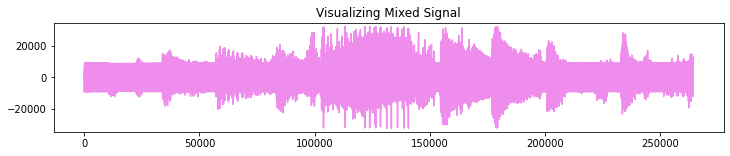

In [15]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Mixed Signal')
plt.plot(mix_signal, c="#ef8ded")
plt.ylim(-35000, 35000)
plt.show()

# Part 3)

In [16]:
def update_w(w, X):
    derivative=np.dot(w.T, X)
    updated_w = (X *np.tanh(np.dot(w.T, X))).mean(axis=1) - derivative.mean() * w
    updated_w /= np.sqrt((updated_w ** 2).sum())
    return updated_w

In [17]:
def whitening_signal(signal):
    covariance_matrix=np.cov(signal)
    d,E=np.linalg.eig(covariance_matrix)
    D=np.diag(d)
    D_inverse=np.linalg.inv(D)
    D_inverse_sqrt=np.sqrt(D_inverse)
    E_transpose=np.transpose(E)
    new_signal=np.dot(E,np.dot(D_inverse_sqrt,np.dot(E_transpose,signal)))
    return(new_signal)

In [18]:
def ica(X, iterations, tolerance=1e-5):
    mean=X.mean(axis=1, keepdims=True)
    X=X-mean
    X = whitening_signal(X)
        
    columnss = X.shape[0]
    W = np.zeros((columnss, columnss), dtype=X.dtype)
    for i in range(columnss):
        
        w = np.random.rand(columnss)
        
        for j in range(iterations):
            
            updated_w = update_w(w, X)
            
            if i >= 1:
                updated_w -= np.dot(np.dot(updated_w, W[:i].T), W[:i])
            
            distance = np.abs(np.abs((w * updated_w).sum()) - 1)
            
            w = updated_w
            
            if distance < tolerance:
                break
                
        W[i, :] = w
        
    S = np.dot(W, X)
    
    return S

In [19]:
mix_signal=np.array(mix_signal)
mix_signal1=np.transpose(mix_signal)

In [20]:
print(mix_signal1)
print(mix_signal.shape)

[[  -23   -16   -28 ... -8994 -9187 -9321]
 [  -52  -624 -1178 ... -6313 -6713 -7091]
 [ 2142  2328  2010 ...  1296  1332  1754]]
(264515, 3)


In [21]:
recovered_signal=ica(mix_signal1,1000)

In [22]:
recovered_signal.shape

(3, 264515)

# Part 4)

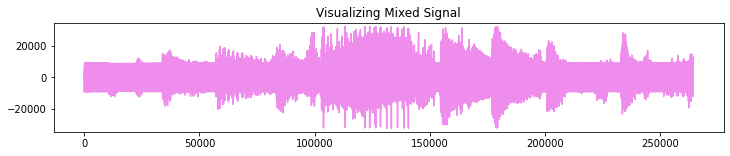

In [23]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Mixed Signal')
plt.plot(mix_signal, c="#ef8ded")
plt.ylim(-35000, 35000)
plt.show()

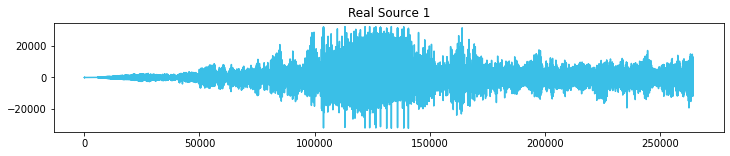

In [24]:
plt.figure(figsize=(12,2))
plt.title('Real Source 1')
plt.plot(signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

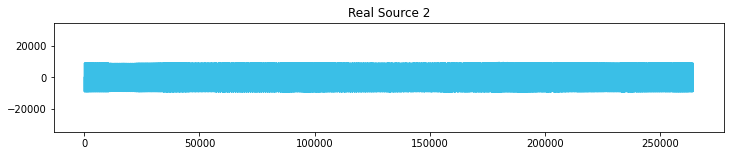

In [25]:
plt.figure(figsize=(12,2))
plt.title('Real Source 2')
plt.plot(signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

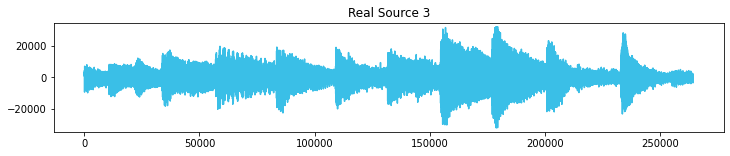

In [26]:
plt.figure(figsize=(12,2))
plt.title('Real Source 3')
plt.plot(signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

In [27]:
recovered_signal_1=recovered_signal[0]

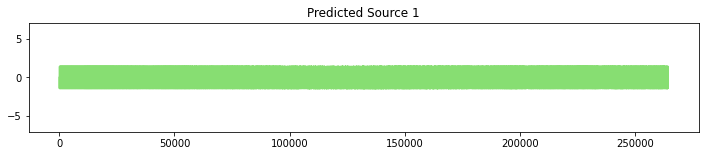

In [28]:
plt.figure(figsize=(12,2))
plt.title('Predicted Source 1')
plt.plot(recovered_signal_1, c="#87de72")
plt.ylim(-7, 7)
plt.show()

In [29]:
recovered_signal_2=recovered_signal[1]

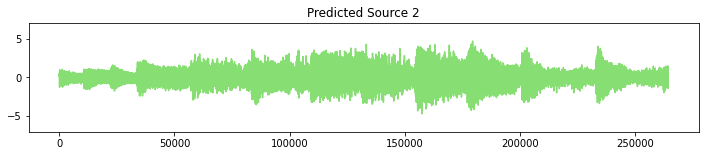

In [30]:
plt.figure(figsize=(12,2))
plt.title('Predicted Source 2')
plt.plot(recovered_signal_2, c="#87de72")
plt.ylim(-7, 7)
plt.show()

In [31]:
recovered_signal_3=recovered_signal[2]

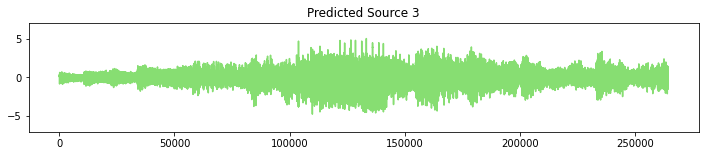

In [32]:
plt.figure(figsize=(12,2))
plt.title('Predicted Source 3')
plt.plot(recovered_signal_3, c="#87de72")
plt.ylim(-7, 7)
plt.show()

# Part 5)

In [33]:
fast_ica = FastICA(n_components=3)
fast_separated=fast_ica.fit_transform(mix_signal)
fast_separated

array([[-4.50191023e-07,  1.58446044e-05, -6.54761376e-04],
       [ 1.33702862e-06,  1.90414594e-04, -7.11590644e-04],
       [-1.76150786e-06,  3.59517163e-04, -6.14522153e-04],
       ...,
       [-2.74321219e-03,  1.93787187e-03, -3.69701139e-04],
       [-2.80232463e-03,  2.06019434e-03, -3.80128237e-04],
       [-2.84409790e-03,  2.17572699e-03, -5.08554127e-04]])

In [34]:
fast_separated.shape

(264515, 3)

# Part 6)

In [35]:
recovered_signal_1_fast=fast_separated[:,1]

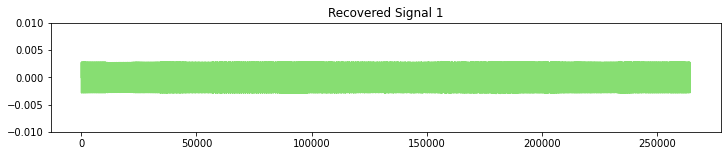

In [36]:
plt.figure(figsize=(12,2))
plt.title('Recovered Signal 1')
plt.plot(recovered_signal_1_fast, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

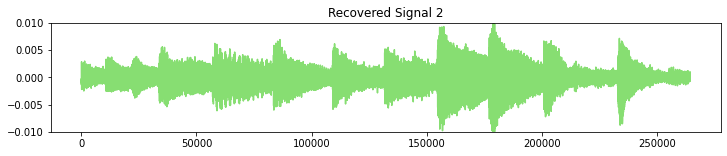

In [37]:
recovered_signal_2_fast=fast_separated[:,2]
plt.figure(figsize=(12,2))
plt.title('Recovered Signal 2')
plt.plot(recovered_signal_2_fast, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

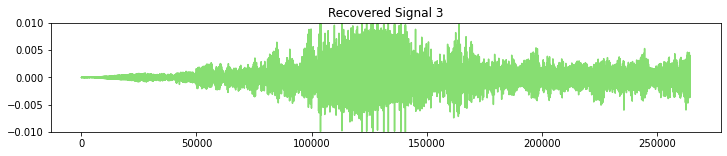

In [38]:
recovered_signal_3_fast=fast_separated[:,0]
plt.figure(figsize=(12,2))
plt.title('Recovered Signal 3')
plt.plot(recovered_signal_3_fast, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

In [39]:
# Converting to int, mapping the appropriate range, and increasing the volume a little bit
audio_signal_1 = np.int16(recovered_signal_1_fast*35000*100)
audio_signal_2 = np.int16(recovered_signal_2_fast*35000*100)
audio_signal_3 = np.int16(recovered_signal_3_fast*35000*100)

# Writing wave files
wavfile.write("audio_signal_1.wav", fs, audio_signal_1)
wavfile.write("audio_signal_2.wav", fs, audio_signal_2)
wavfile.write("audio_signal_3.wav", fs, audio_signal_3)

In [40]:
IPython.display.Audio("audio_signal_1.wav")

In [41]:
IPython.display.Audio("audio_signal_2.wav")

In [42]:
IPython.display.Audio("audio_signal_3.wav")

# Q2

# Part 1)

In [ ]:
data_q2 = pd.read_csv('/content/drive/MyDrive/train.csv')
print(data_q2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
data_q2=data_q2.dropna()
print(data_q2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [ ]:
encode=LabelEncoder()
def encode_data(data):
    y=data.columns
    for i in y:
        if(type(data[i][0])==type("2")):
            x=encode.fit_transform(data[i])
            data[i]=x

    return(data)
data_q2=encode_data(data_q2)

In [ ]:
X=data_q2.drop(columns=['satisfaction'])
Y=data_q2[['satisfaction']]

# Part 2)

In [ ]:
model = DTC()
sfs = SFS(model, forward=True, cv = 10, k_features = 10,scoring='accuracy', floating=False)

# Part 3)

In [ ]:
sfs.fit(X,Y)

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=10, scoring='accuracy')

In [ ]:
col=X.columns

In [ ]:
data_sfs=sfs.subsets_
data_sfs

{1: {'avg_score': 0.7903353173205476,
  'cv_scores': array([0.78397683, 0.79478764, 0.79391892, 0.79179537, 0.78945844,
         0.7912926 , 0.79447823, 0.79071339, 0.7884931 , 0.78443865]),
  'feature_idx': (13,),
  'feature_names': ('Online boarding',)},
 2: {'avg_score': 0.8496148258224714,
  'cv_scores': array([0.8457529 , 0.85028958, 0.85096525, 0.85318533, 0.84863404,
         0.84728256, 0.85606719, 0.84728256, 0.85008205, 0.84660682]),
  'feature_idx': (5, 13),
  'feature_names': ('Type of Travel', 'Online boarding')},
 3: {'avg_score': 0.8912484788375318,
  'cv_scores': array([0.89005792, 0.89401544, 0.89189189, 0.89411197, 0.88869582,
         0.8900473 , 0.8956463 , 0.89043344, 0.88811661, 0.8894681 ]),
  'feature_idx': (5, 8, 13),
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding')},
 4: {'avg_score': 0.9218391194346885,
  'cv_scores': array([0.91920849, 0.92027027, 0.92162162, 0.92451737, 0.92035911,
         0.91842842, 0.92431702, 0.92

In [ ]:
print("The accuracy for all the 10 best features is: ",data_sfs[10]['avg_score']*100,"%")
print("The best features selected by SFS are:")
feature_ind=data_sfs[10]['feature_idx']
for i in range(0,len(feature_ind)):
  print(i+1,col[feature_ind[i]])

The accuracy for all the 10 best features is:  95.113615974172 %
The best features selected by SFS are:
1 Customer Type
2 Type of Travel
3 Class
4 Inflight wifi service
5 Gate location
6 Online boarding
7 Seat comfort
8 Inflight entertainment
9 Baggage handling
10 Inflight service


# Part 4)

In [ ]:
sfs_ = SFS(model, forward=True, cv = 4, k_features = 10,scoring='accuracy', floating=False)
sfs_.fit(X,Y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          k_features=10, scoring='accuracy')

In [ ]:
sbs = SFS(model, forward=False, cv = 4, k_features = 10,scoring='accuracy', floating=False)
sbs.fit(X.values,Y.values)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          forward=False, k_features=10, scoring='accuracy')

In [ ]:
sffs = SFS(model, forward=True, cv = 4, k_features = 10,scoring='accuracy', floating=False)
sffs.fit(X.values,Y.values)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          k_features=10, scoring='accuracy')

In [ ]:
sbfs = SFS(model, forward=True, cv = 4, k_features = 10,scoring='accuracy', floating=True)
sbfs.fit(X.values,Y.values)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, k_features=10, scoring='accuracy')

In [ ]:
data_sfs_=sfs_.subsets_
print("The accuracy for all the 10 best features is: ",data_sfs_[10]['avg_score']*100,"%")
print("The CV score for SFS is:",data_sfs_[10]['cv_scores'])
print("The best features selected by SFS are:")
feature_ind=data_sfs_[10]['feature_idx']
for i in range(0,len(feature_ind)):
  print(i+1,col[feature_ind[i]])

The accuracy for all the 10 best features is:  95.02674011665538 %
The CV score for SFS is: [0.94914862 0.95022974 0.94991891 0.95177234]
The best features selected by SFS are:
1 Customer Type
2 Type of Travel
3 Class
4 Inflight wifi service
5 Gate location
6 Online boarding
7 Seat comfort
8 Inflight entertainment
9 Baggage handling
10 Inflight service


In [ ]:
data_sbs_=sbs.subsets_
print("The accuracy for all the 10 best features is: ",data_sbs_[10]['avg_score']*100,"%")
print("The CV score for SBS is:",data_sbs_[10]['cv_scores'])
print("The best features selected by SBS are:")
feature_ind=data_sbs_[10]['feature_idx']
for i in range(0,len(feature_ind)):
  print(i+1,col[feature_ind[i]])

The accuracy for all the 10 best features is:  95.15512516646321 %
The CV score for SBS is: [0.95131086 0.9514267  0.95049811 0.95296934]
The best features selected by SBS are:
1 Customer Type
2 Type of Travel
3 Class
4 Inflight wifi service
5 Online boarding
6 Seat comfort
7 Inflight entertainment
8 Baggage handling
9 Inflight service
10 Cleanliness


In [ ]:
data_sffs=sffs.subsets_
print("The accuracy for all the 10 best features is: ",data_sffs[10]['avg_score']*100,"%")
print("The CV score for SFFS is:",data_sffs[10]['cv_scores'])
print("The best features selected by SBS are:")
feature_ind=data_sffs[10]['feature_idx']
for i in range(0,len(feature_ind)):
  print(i+1,col[feature_ind[i]])

The accuracy for all the 10 best features is:  95.01032988120497 %
The CV score for SFFS is: [0.94880111 0.95026835 0.94995753 0.95138621]
The best features selected by SBS are:
1 Customer Type
2 Type of Travel
3 Class
4 Inflight wifi service
5 Gate location
6 Online boarding
7 Seat comfort
8 Inflight entertainment
9 Baggage handling
10 Inflight service


In [ ]:
data_sbfs_=sbfs.subsets_
print("The accuracy for all the 10 best features is: ",data_sbfs_[10]['avg_score']*100,"%")
print("The CV score for SBFS is:",data_sbfs_[10]['cv_scores'])
print("The best features selected by SBS are:")
feature_ind=data_sbfs_[10]['feature_idx']
for i in range(0,len(feature_ind)):
  print(i+1,col[feature_ind[i]])

The accuracy for all the 10 best features is:  95.13871545283055 %
The CV score for SBFS is: [0.95080891 0.95107919 0.95053672 0.95312379]
The best features selected by SBS are:
1 Customer Type
2 Type of Travel
3 Class
4 Inflight wifi service
5 Online boarding
6 Seat comfort
7 Inflight entertainment
8 Baggage handling
9 Inflight service
10 Cleanliness


# Part 5)

In [ ]:
pd.DataFrame.from_dict(sfs_.get_metric_dict()).T

feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 11, 13, 14, 18, 20)   
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9425846557782154, 0.939...    0.9413   
7   [0.9463299741302753, 0.948646665894436, 0.9486...  0.948231   
8   [0.9495733426001004, 0.9502683501293486, 0.950...  0.950615   
9   [0.9487625004826441, 0.9508089115409861, 0.951...  0.950789   
10  [0.9491486157766709, 0.950229738599946, 0.9499...  0.950267   

                                        feature_names  ci_bound   std_dev  \
1                                  (Online boarding,)  0.004065  0.002536   
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002925  0.001825   
7   (Customer Type, Type of Travel, Class, Infligh...   0.00182  0.001135   
8   (Customer Type, Type of Travel, Class, Infligh...   0.00131  0.000817   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002095  0.001307   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001529  0.000954   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6   0.001053  
7   0.000656  
8   0.000472  
9   0.000755  
10  0.000551

In [ ]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

feature_idx  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
21  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...   
20  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16...   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...   
18  (1, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 16, 17, ...   
17  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 16, 17, 18,...   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...   
15  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...   
13   (3, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20, 21)   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)   
11           (3, 5, 6, 8, 11, 13, 14, 15, 18, 20, 21)   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)   

                                            cv_scores avg_score  \
24  [0.9260589211938685, 0.9481061044827985, 0.946...  0.939388   
23  [0.9432796633074636, 0.9467160894243021, 0.945...   0.94573   
22  [0.9451716282481949, 0.9476813776593691, 0.944...   0.94659   
21  [0.9465616433066913, 0.9483377736592147, 0.945...  0.947603   
20  [0.9460983049538593, 0.9486080543650334, 0.946...  0.947439   
19  [0.9450557936599868, 0.9490327811884629, 0.947...   0.94768   
18  [0.9440518938955172, 0.948646665894436, 0.9445...  0.946976   
17  [0.9457508011892352, 0.9487238889532414, 0.944...  0.946908   
16  [0.9465616433066913, 0.9472566508359396, 0.945...  0.946754   
15  [0.9458666357774431, 0.9471022047183288, 0.944...  0.946445   
14  [0.9442835630719333, 0.9476427661299665, 0.944...  0.945624   
13  [0.9443607861307386, 0.9437816131896984, 0.945...   0.94518   
12  [0.9461755280126646, 0.9472566508359396, 0.946...  0.947449   
11  [0.9490327811884629, 0.9503455731881539, 0.949...  0.949814   
10  [0.951310861423221, 0.951426696011429, 0.95049...  0.951551   

                                        feature_names  ci_bound   std_dev  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.014016  0.008744   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.002754  0.001718   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.002734  0.001705   
21  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...  0.002581   0.00161   
20  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16...   0.00216  0.001347   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...  0.002732  0.001704   
18  (1, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 16, 17, ...  0.004409  0.002751   
17  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 16, 17, 18,...  0.002661   0.00166   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...  0.001435  0.000895   
15  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...  0.002009  0.001253   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...  0.002262  0.001411   
13   (3, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20, 21)   0.00226   0.00141   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)  0.002671  0.001666   
11           (3, 5, 6, 8, 11, 13, 14, 15, 18, 20, 21)  0.001118  0.000697   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)  0.001432  0.000894   

     std_err  
24  0.005048  
23  0.000992  
22  0.000985  
21  0.000929  
20  0.000778  
19  0.000984  
18  0.001588  
17  0.000959  
16  0.000517  
15  0.000724  
14  0.000815  
13  0.000814  
12  0.000962  
11  0.000403  
10  0.000516

In [ ]:
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 11, 13, 14, 18, 20)   
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9425074327194101, 0.939...   0.94128   
7   [0.946368585659678, 0.9486852774238388, 0.9486...  0.948279   
8   [0.9497277887177111, 0.9504227962469594, 0.950...  0.950711   
9   [0.9487625004826441, 0.9511950268350129, 0.951...  0.950972   
10  [0.9488011120120468, 0.9502683501293486, 0.949...  0.950103   

                           feature_names  ci_bound   std_dev   std_err  
1                                  (13,)  0.004065  0.002536  0.001464  
2                                (5, 13)  0.002085    0.0013  0.000751  
3                             (5, 8, 13)  0.002214  0.001381  0.000797  
4                         (5, 8, 11, 13)  0.002346  0.001463  0.000845  
5                      (3, 5, 8, 11, 13)  0.001202   0.00075  0.000433  
6                  (3, 5, 8, 11, 13, 18)  0.002904  0.001811  0.001046  
7               (3, 5, 6, 8, 11, 13, 18)  0.001846  0.001152  0.000665  
8           (3, 5, 6, 8, 11, 13, 18, 20)  0.001178  0.000735  0.000424  
9       (3, 5, 6, 8, 11, 13, 14, 18, 20)  0.002193  0.001368   0.00079  
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)  0.001476  0.000921  0.000532

In [ ]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 13, 14, 15, 18, 20)   
10  (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.942623267307618, 0.9396...  0.941309   
7   [0.9463299741302753, 0.948646665894436, 0.9485...  0.948211   
8   [0.9497277887177111, 0.9503069616587513, 0.950...  0.950692   
9   [0.950693076952778, 0.9511564153056102, 0.9499...  0.951011   
10  [0.9508089115409861, 0.9510791922468049, 0.950...  0.951387   

                           feature_names  ci_bound   std_dev   std_err  
1                                  (13,)  0.004065  0.002536  0.001464  
2                                (5, 13)  0.002085    0.0013  0.000751  
3                             (5, 8, 13)  0.002214  0.001381  0.000797  
4                         (5, 8, 11, 13)  0.002346  0.001463  0.000845  
5                      (3, 5, 8, 11, 13)  0.001202   0.00075  0.000433  
6                  (3, 5, 8, 11, 13, 18)  0.002936  0.001832  0.001057  
7               (3, 5, 6, 8, 11, 13, 18)  0.001811   0.00113  0.000652  
8           (3, 5, 6, 8, 11, 13, 18, 20)  0.001296  0.000809  0.000467  
9       (3, 5, 6, 8, 13, 14, 15, 18, 20)  0.001325  0.000826  0.000477  
10  (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)  0.001636  0.001021  0.000589

# Part 6)

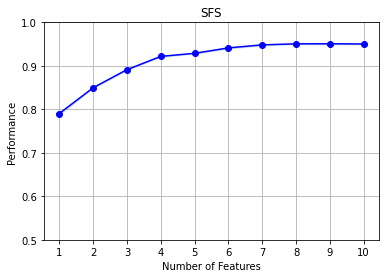

In [ ]:
fig1 = plot_sfs(sfs_.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('SFS')
plt.grid()
plt.show()

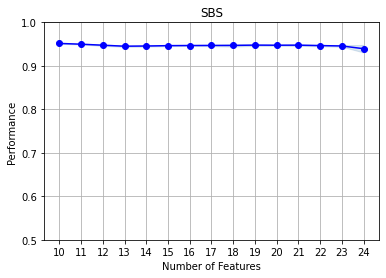

In [ ]:
fig2 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('SBS')
plt.grid()
plt.show()

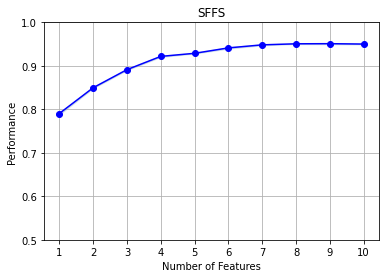

In [ ]:
fig3 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('SFFS')
plt.grid()
plt.show()

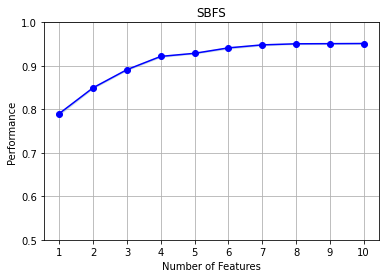

In [ ]:
fig4 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('SBFS')
plt.grid()
plt.show()

# Part 7)

Increasing Features for Part 2

In [ ]:
sfs_incre_1 = SFS(model, forward=True, cv = 10, k_features = (13),scoring='accuracy')
sfs_incre_1.fit(X,Y)

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=13, scoring='accuracy')

In [ ]:
sfs_incre_2 = SFS(model, forward=True, cv = 10, k_features = (15),scoring='accuracy')
sfs_incre_2.fit(X,Y)

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=15, scoring='accuracy')

In [ ]:
data_sfs_incre_1=sfs_incre_1.subsets_
data_sfs_incre_2=sfs_incre_2.subsets_

The accuracy of SFS for 13 features is: 0.9490994075246897


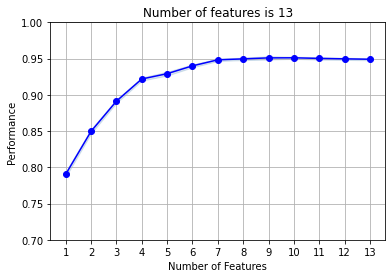

In [ ]:
print("The accuracy of SFS for 13 features is:",data_sfs_incre_1[13]['avg_score'])
fig1 = plot_sfs(sfs_incre_1.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Number of features is 13')
plt.grid()
plt.show()

The accuracy of SFS for 15 features is: 0.9468985067356049


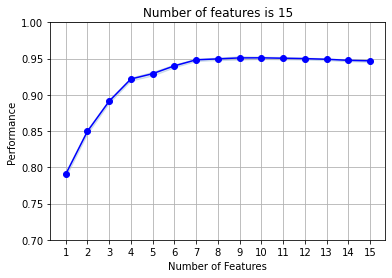

In [ ]:
print("The accuracy of SFS for 15 features is:",data_sfs_incre_2[15]['avg_score'])
fig1 = plot_sfs(sfs_incre_2.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Number of features is 15')
plt.grid()
plt.show()

Decreasing Features for Part 2

In [ ]:
sfs_decre_1 = SFS(model, forward=True, cv = 10, k_features = (7),scoring='accuracy')
sfs_decre_1.fit(X,Y)

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=7, scoring='accuracy')

In [ ]:
sfs_decre_2 = SFS(model, forward=True, cv = 10, k_features = (5),scoring='accuracy')
sfs_decre_2.fit(X,Y)

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=5, scoring='accuracy')

In [ ]:
data_sfs_decre_1=sfs_decre_1.subsets_
data_sfs_decre_2=sfs_decre_2.subsets_

The accuracy of SFS for 7 features is: 0.9483078495524195


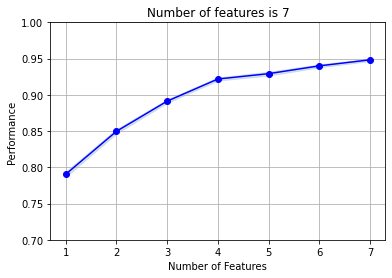

In [ ]:
print("The accuracy of SFS for 7 features is:",data_sfs_decre_1[7]['avg_score'])
fig1 = plot_sfs(sfs_decre_1.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Number of features is 7')
plt.grid()
plt.show()

The accuracy of SFS for 5 features is: 0.9291947734628014


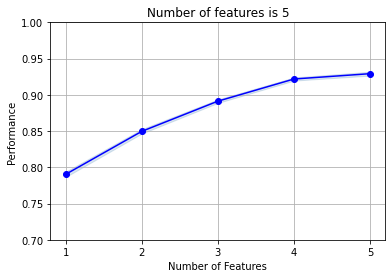

In [ ]:
print("The accuracy of SFS for 5 features is:",data_sfs_decre_1[5]['avg_score'])
fig1 = plot_sfs(sfs_decre_2.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Number of features is 5')
plt.grid()
plt.show()